<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/SEL_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos las librerías necesarias
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Carga de BD desde drive

r_2015 ='/content/drive/MyDrive/analitica3/base_datos/r_2015_e.csv'
r_2016 ='/content/drive/MyDrive/analitica3/base_datos/r_2016_e.csv'

r_2015 = pd.read_csv(r_2015)
r_2016 = pd.read_csv(r_2016)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [4]:
#cambiamos el nombre de la variable objetivo a target
r_2015 = r_2015.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2015 = r_2015.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2015 = le.fit_transform(y2015)

print(y2015[0:5])

print(le.classes_)

[0 0 0 0 0]
['No' 'Yes']


In [5]:
#cambiamos el nombre de la variable objetivo a target
r_2016 = r_2016.rename(columns = {'attrition' : 'target'})
 #renombramos la variable objetivo
y2016 = r_2016.target
# LabelEncoder: Transformarmos la variable objetivo en numérica.
le = LabelEncoder()
y2016 = le.fit_transform(y2016)

print(y2016[0:5])

print(le.classes_)

[0 1 0 0 0]
['No' 'Yes']


In [6]:
r_2015=r_2015.drop(['Unnamed: 0'],axis=1)

In [7]:
r_2016=r_2016.drop(['Unnamed: 0'],axis=1)

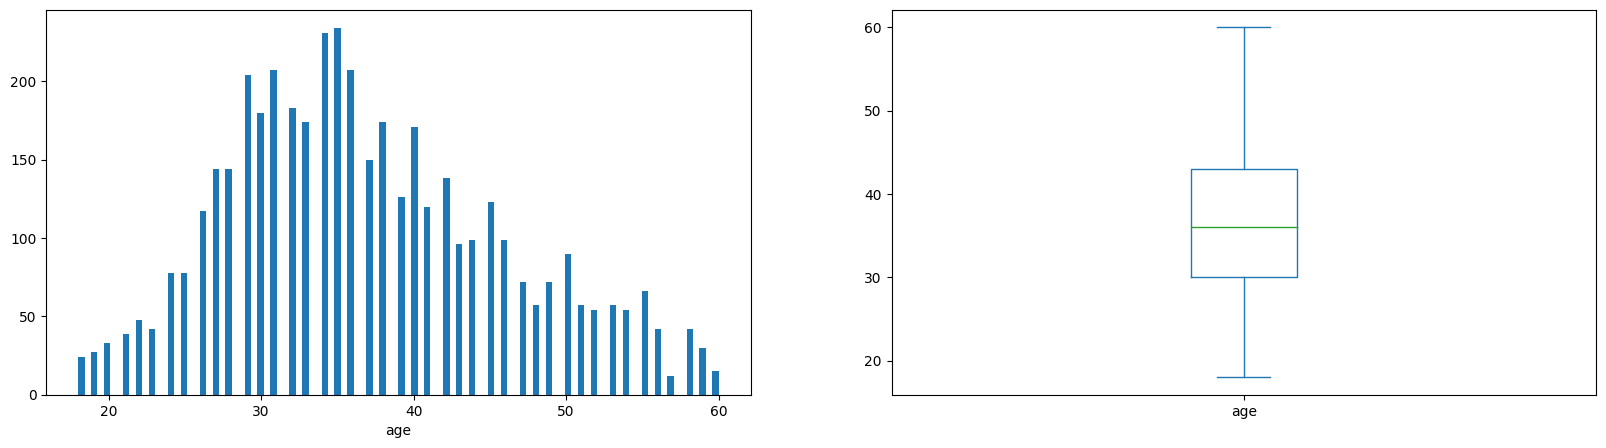

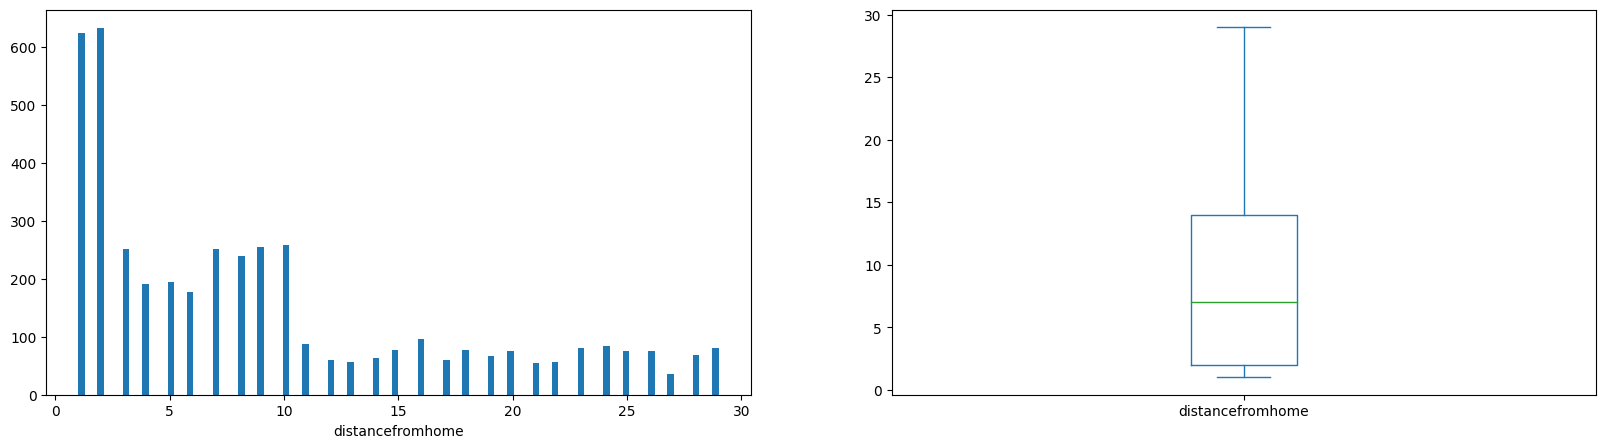

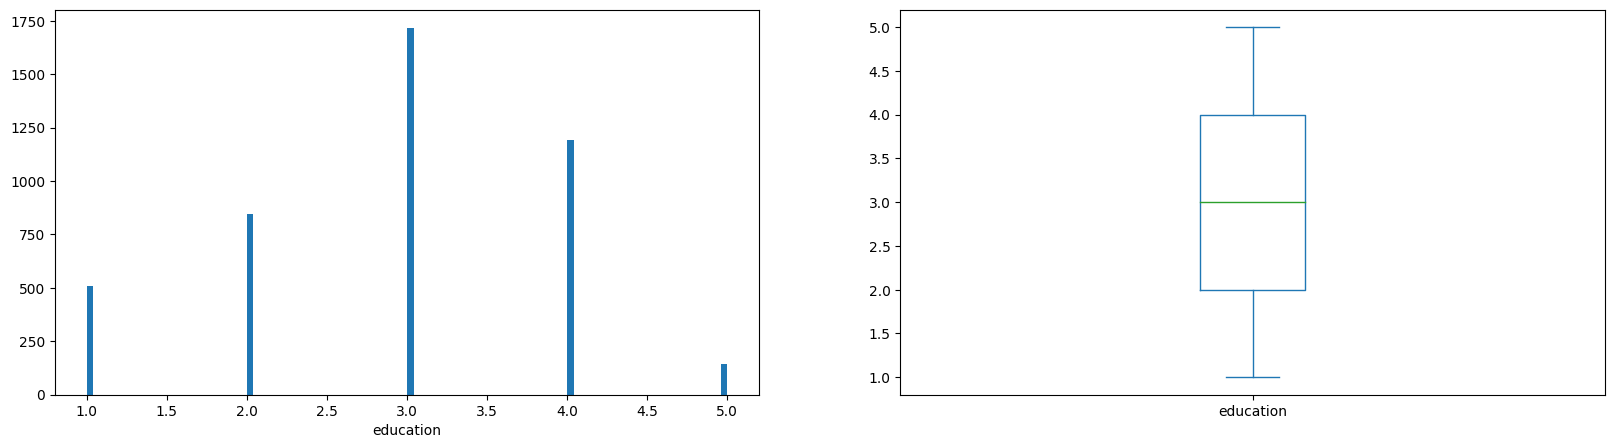

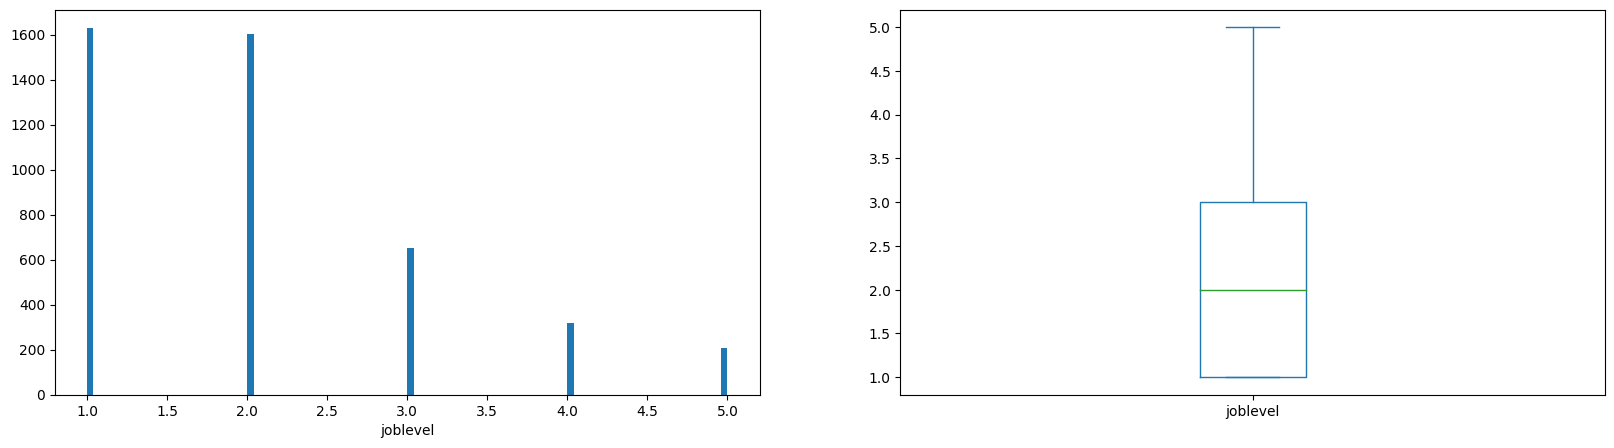

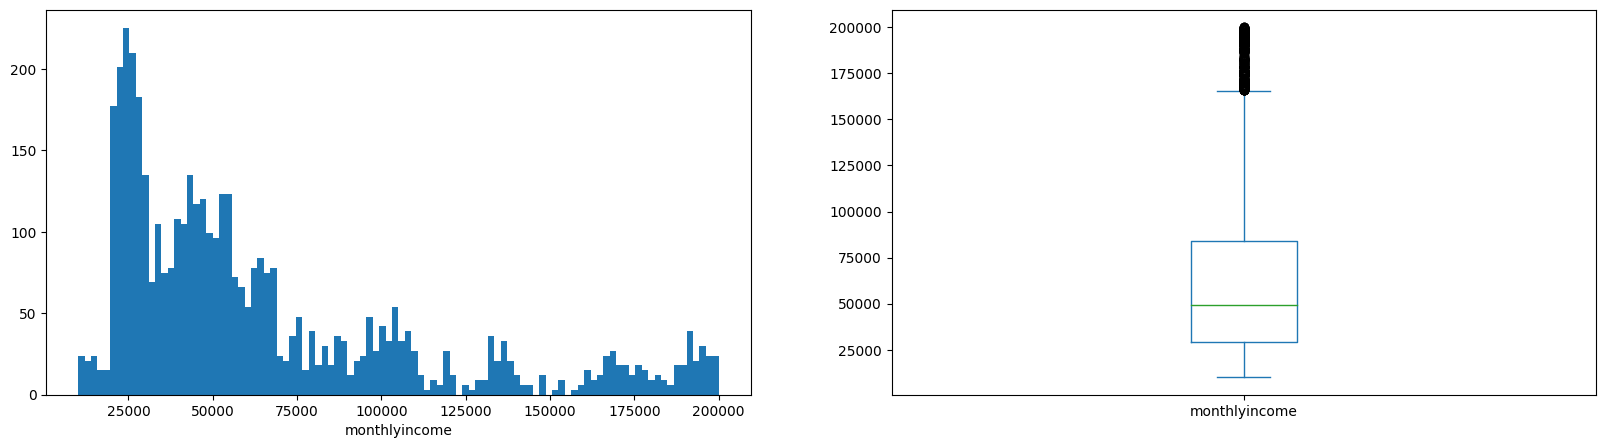

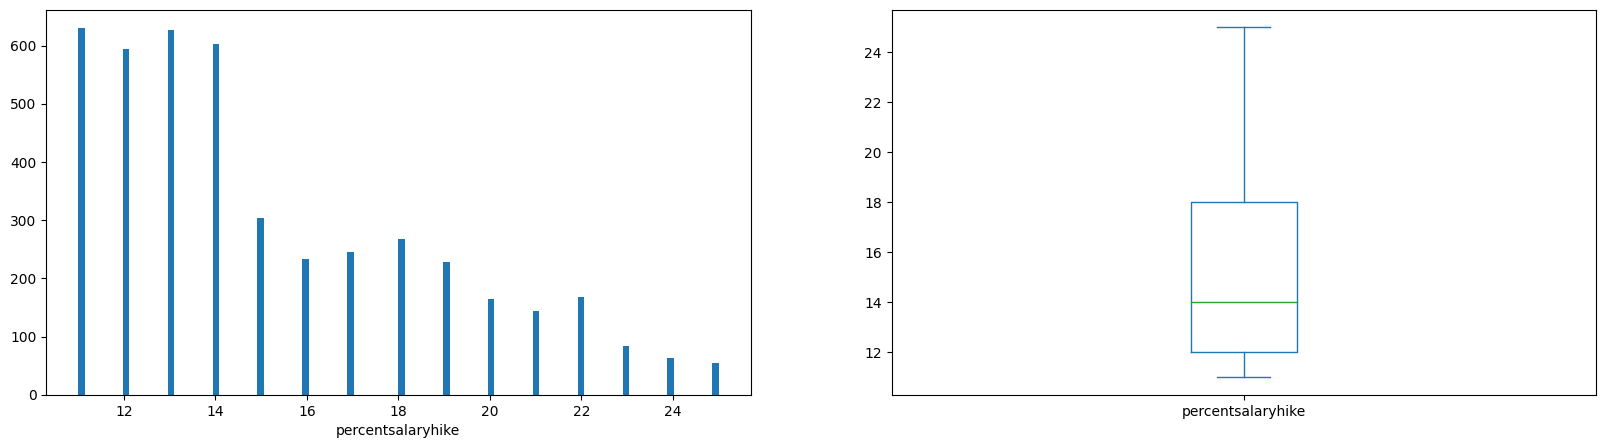

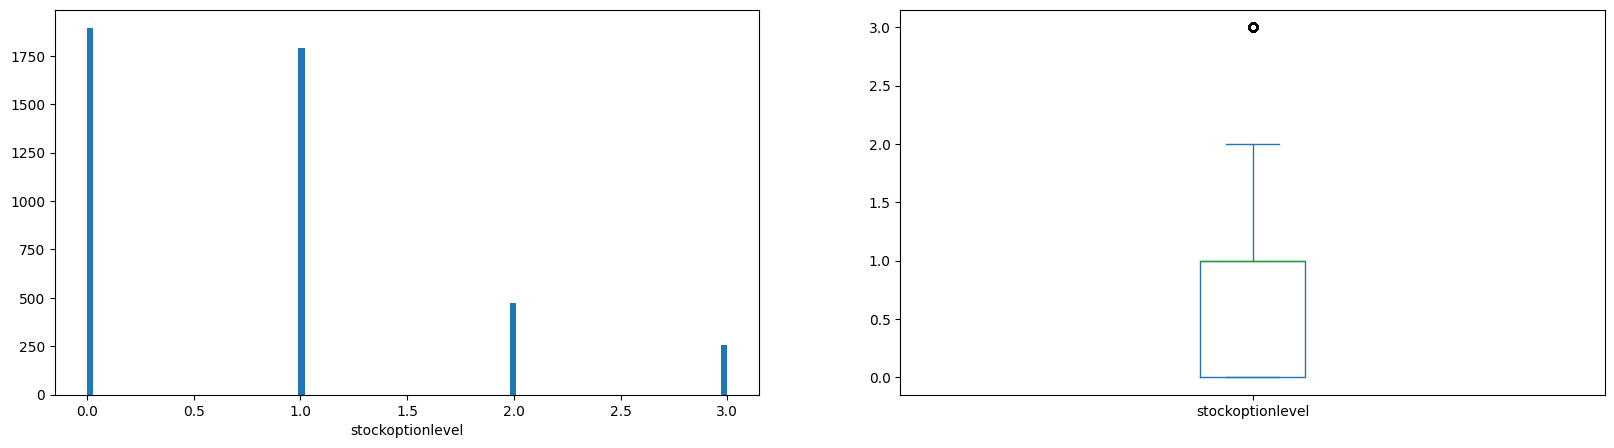

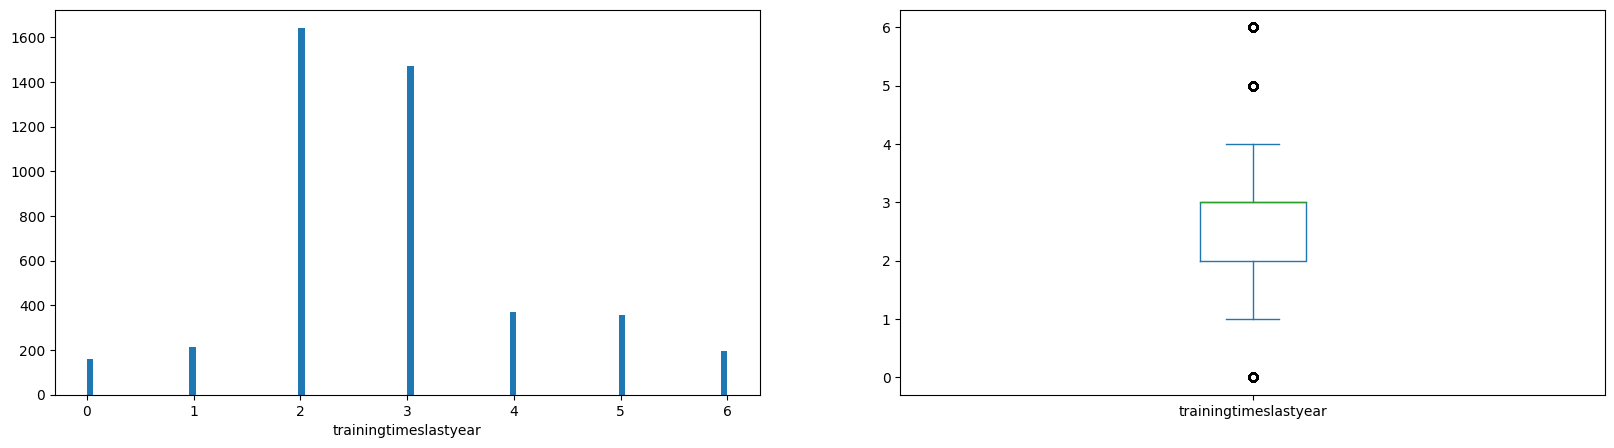

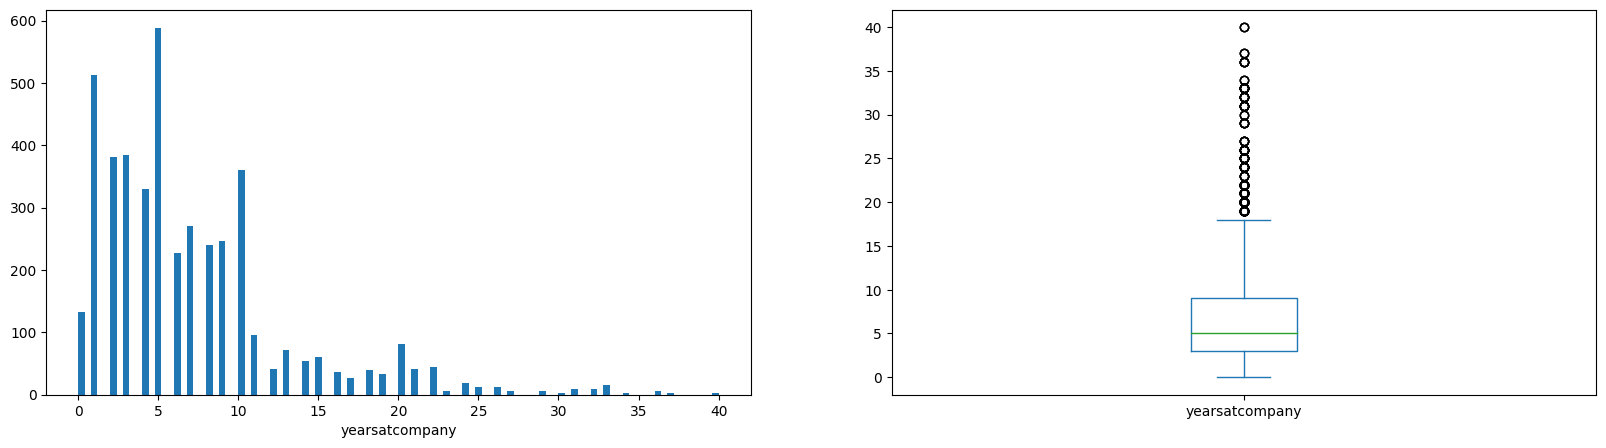

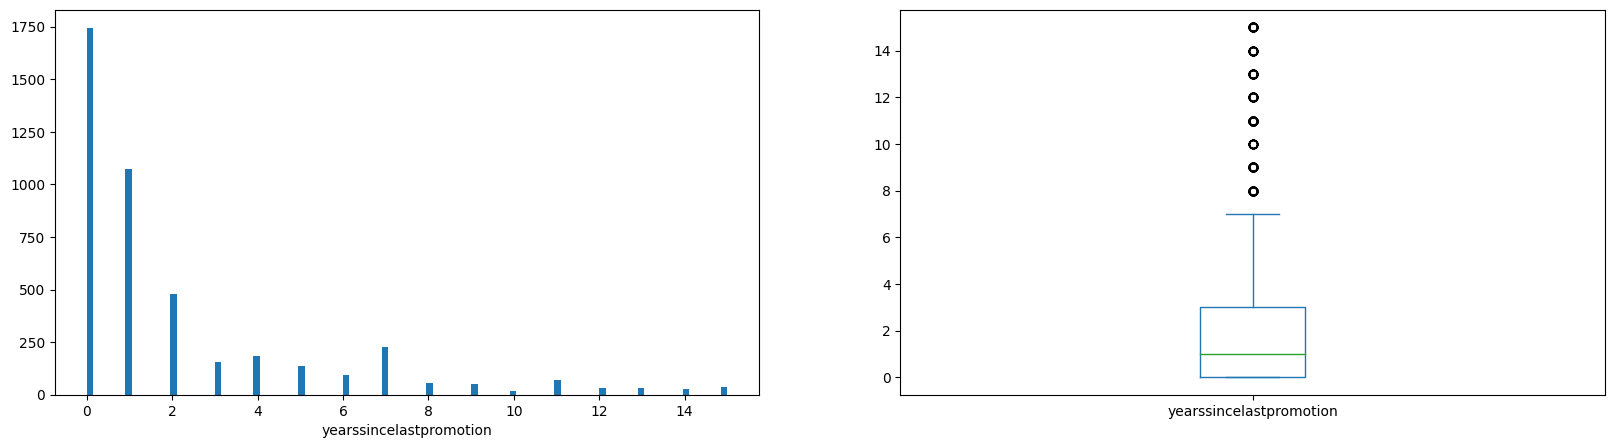

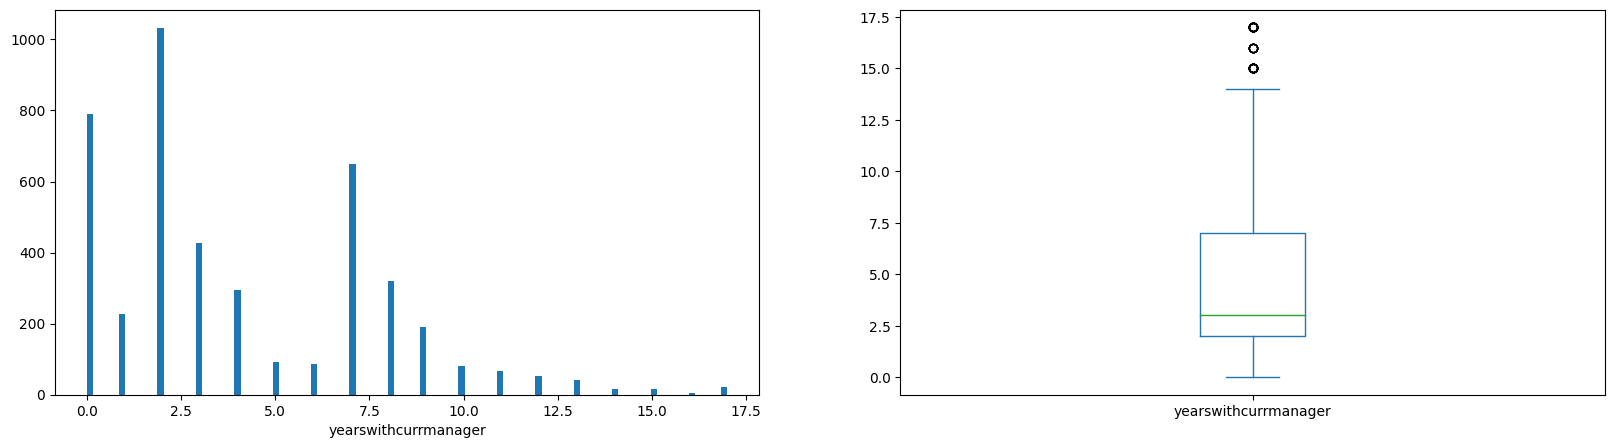

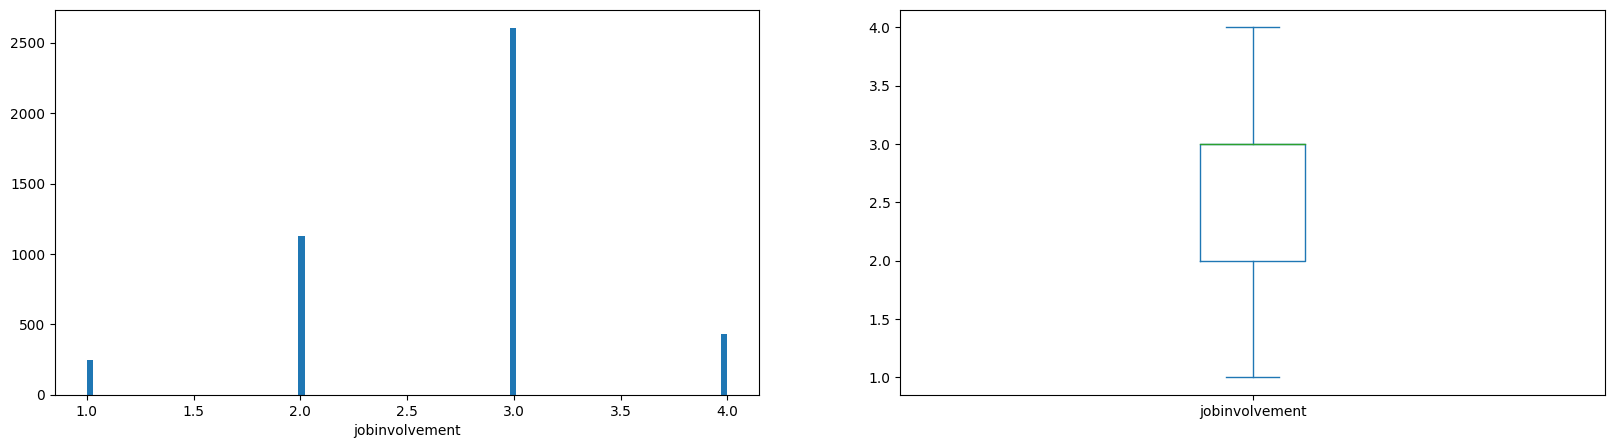

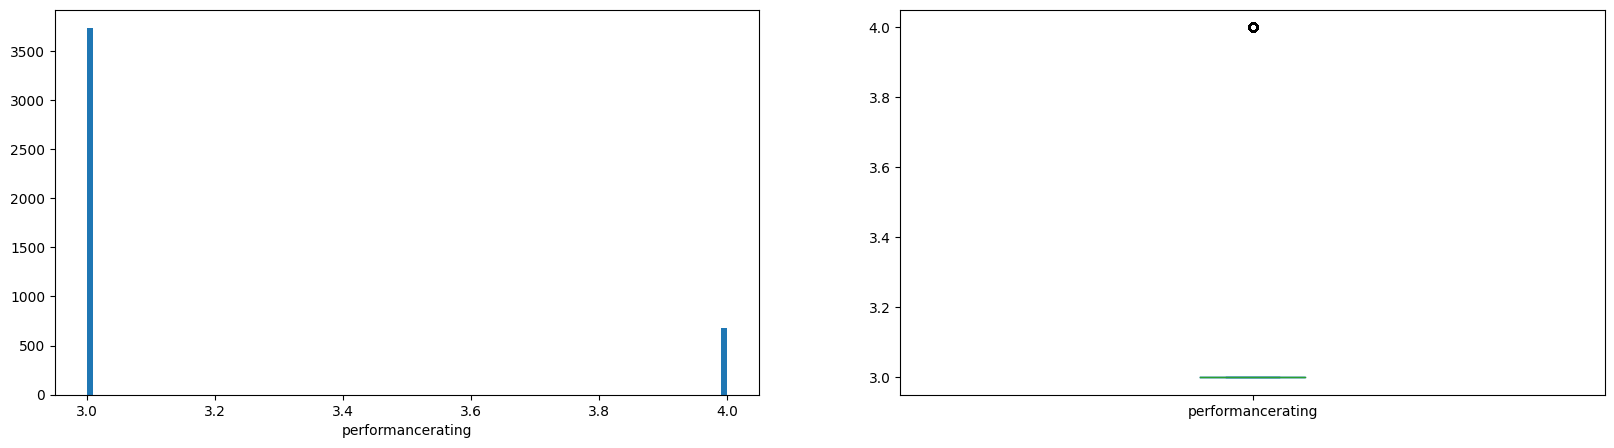

In [8]:
#COLUMNAS NUMERICAS ENTERAS
X_int2015=r_2015.select_dtypes(include=['int64'])
# X_int


for variable in X_int2015:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2015[variable].plot(kind='box')

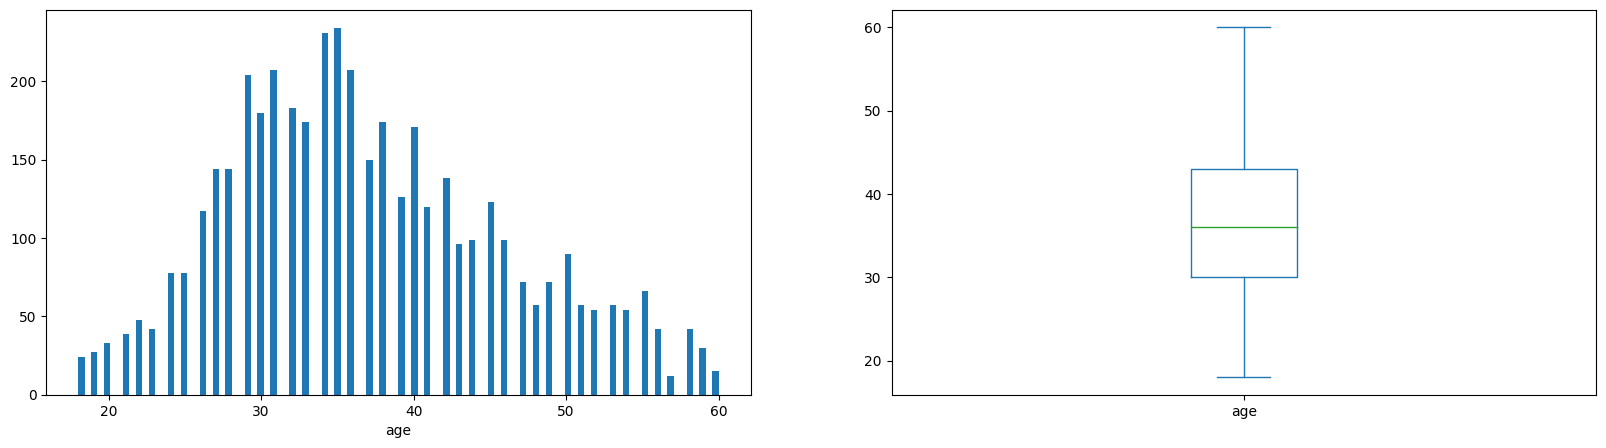

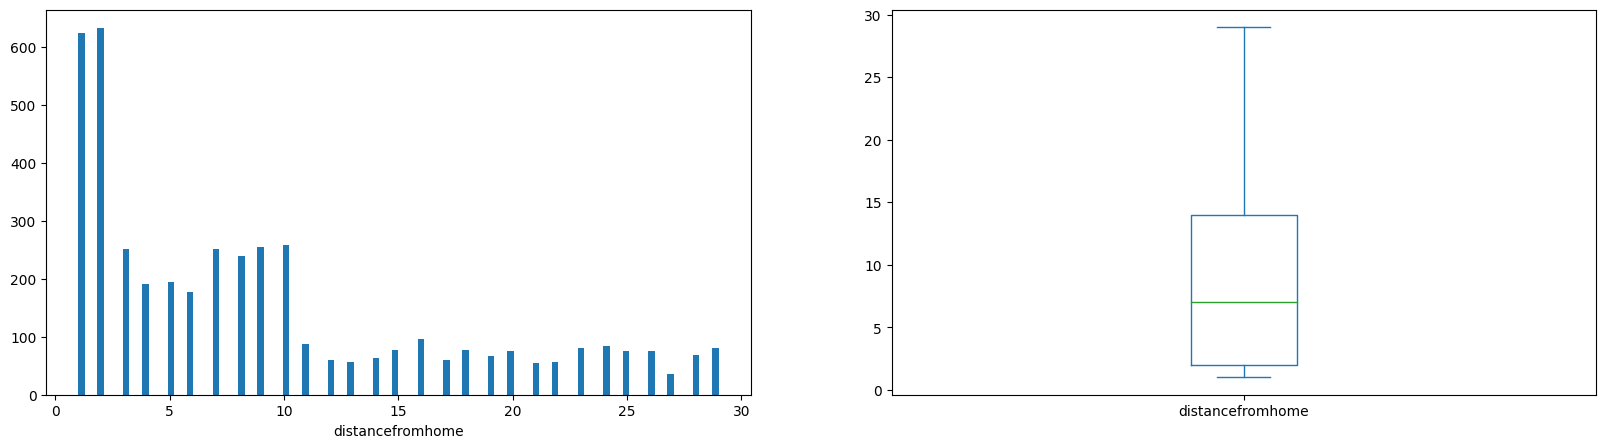

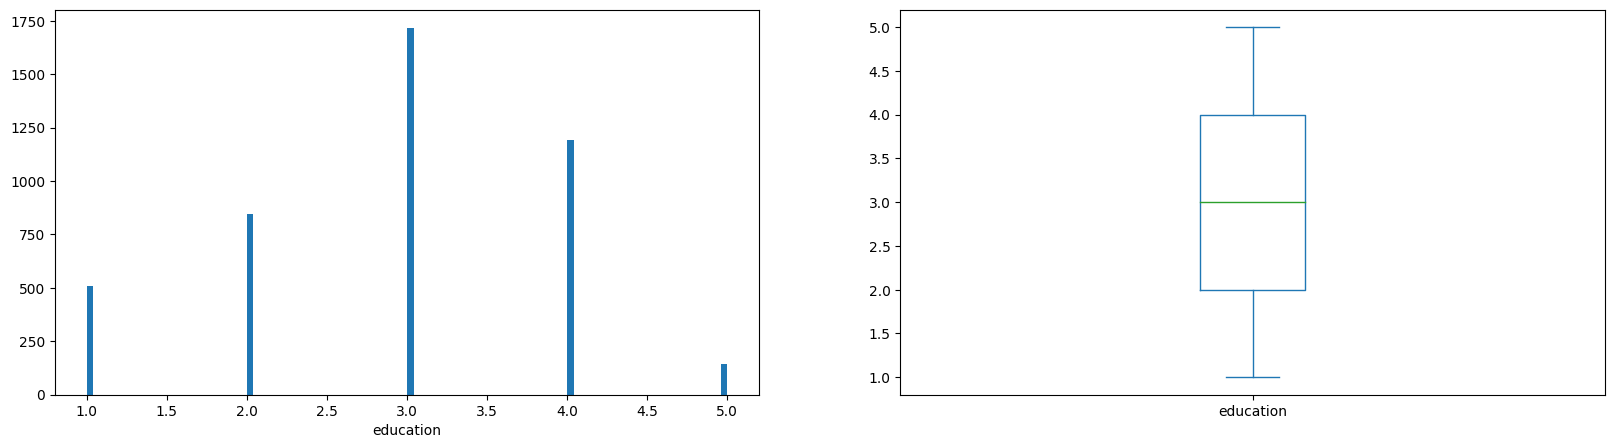

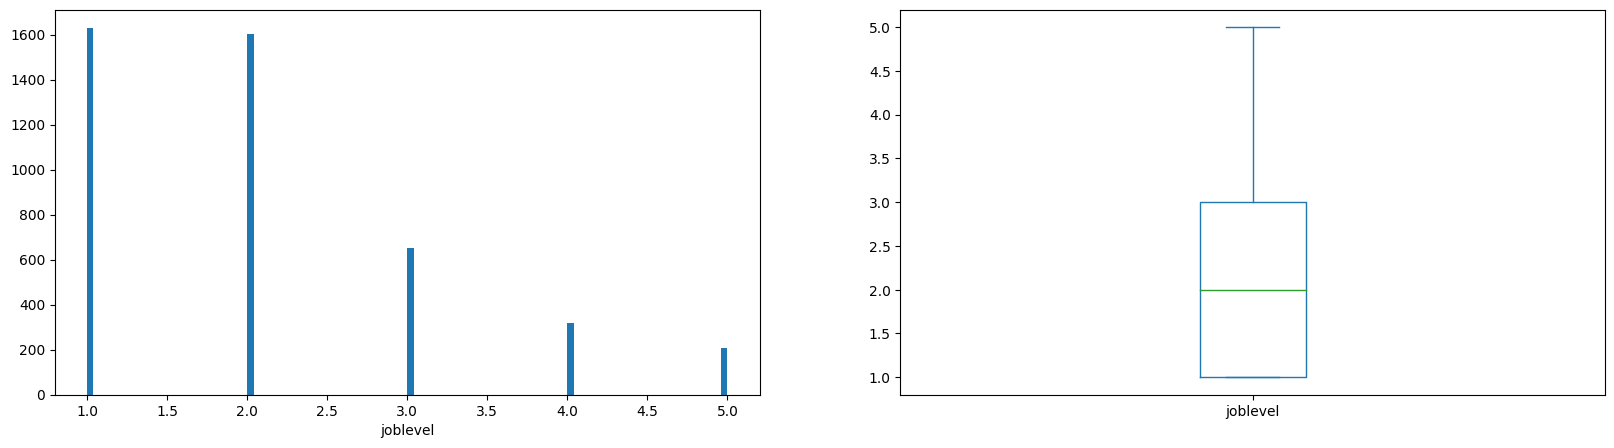

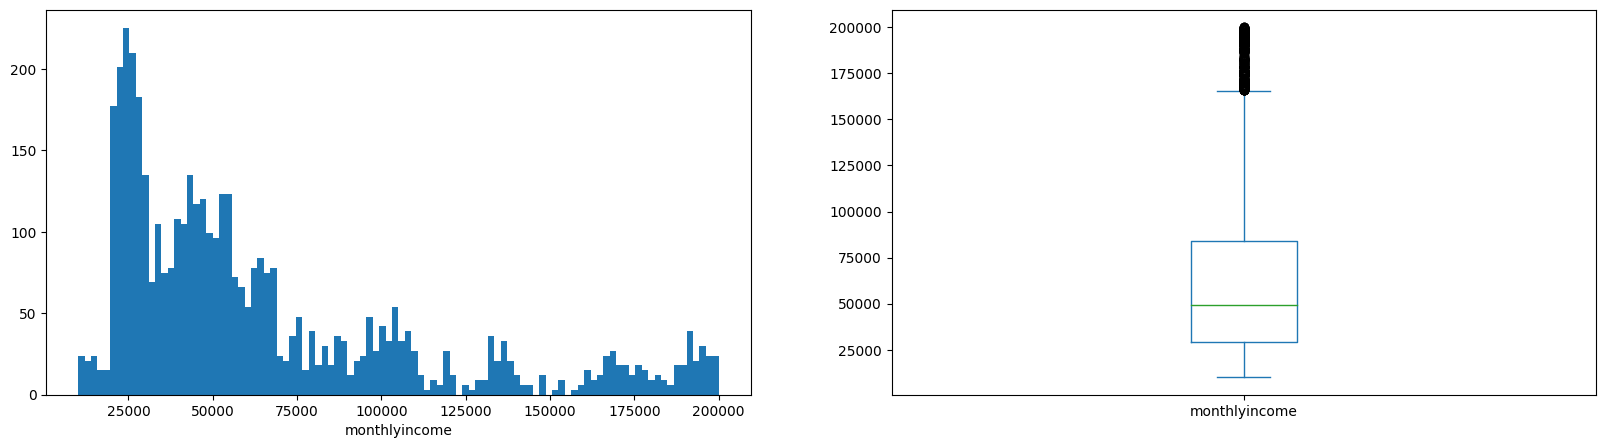

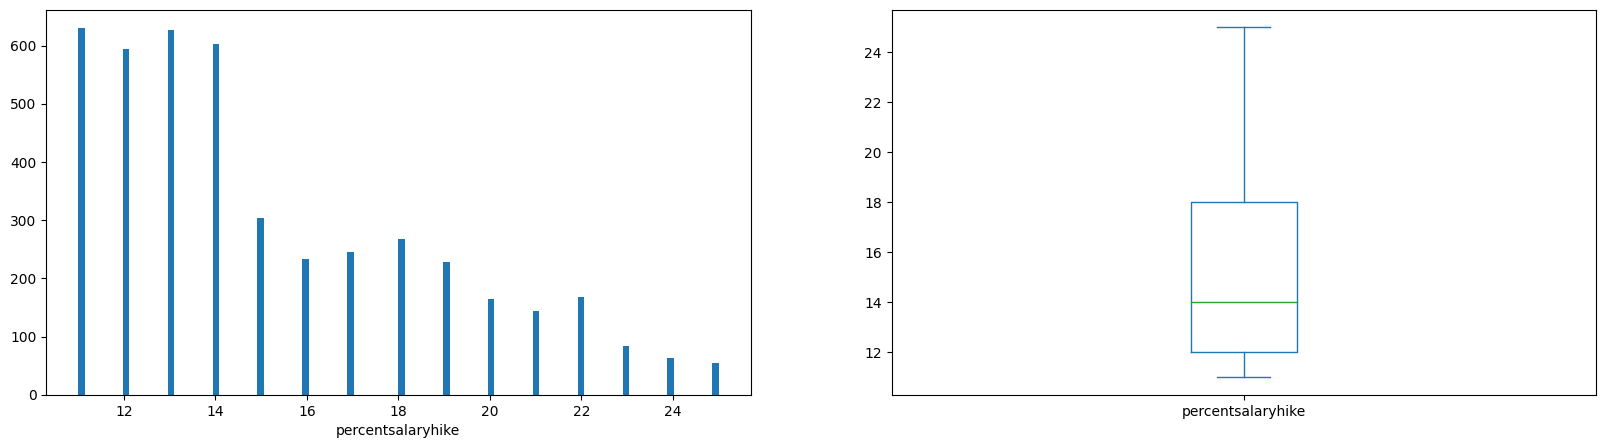

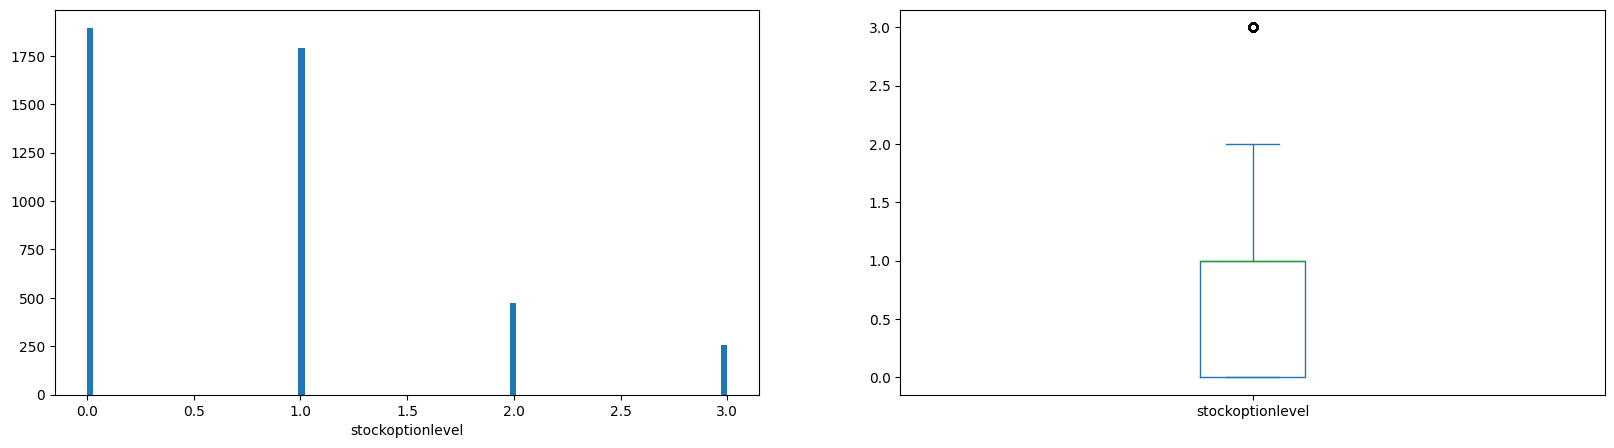

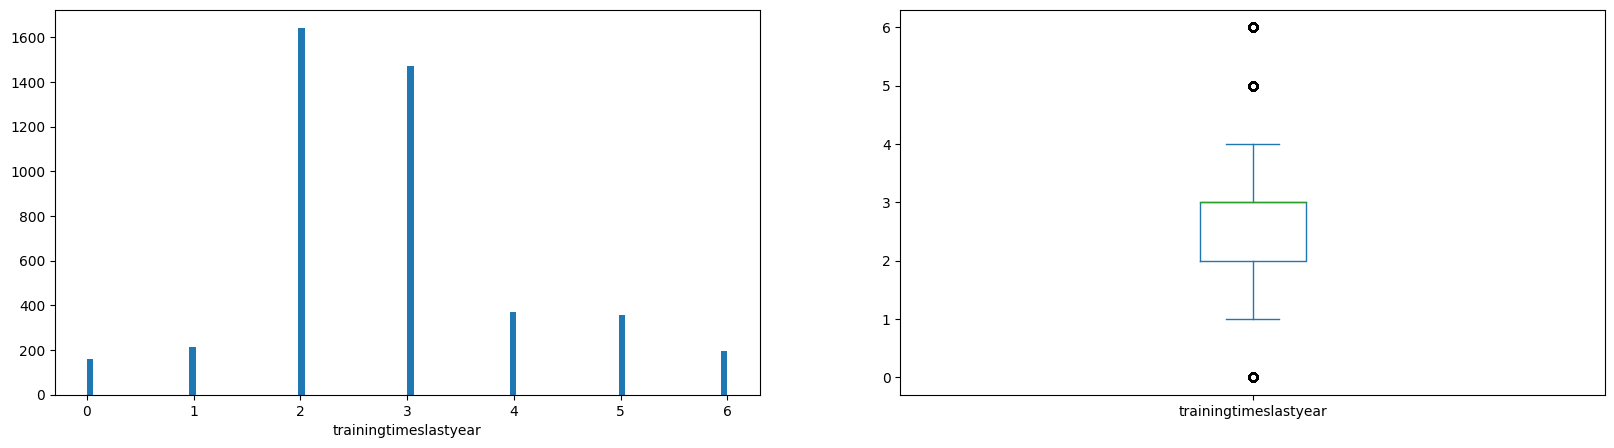

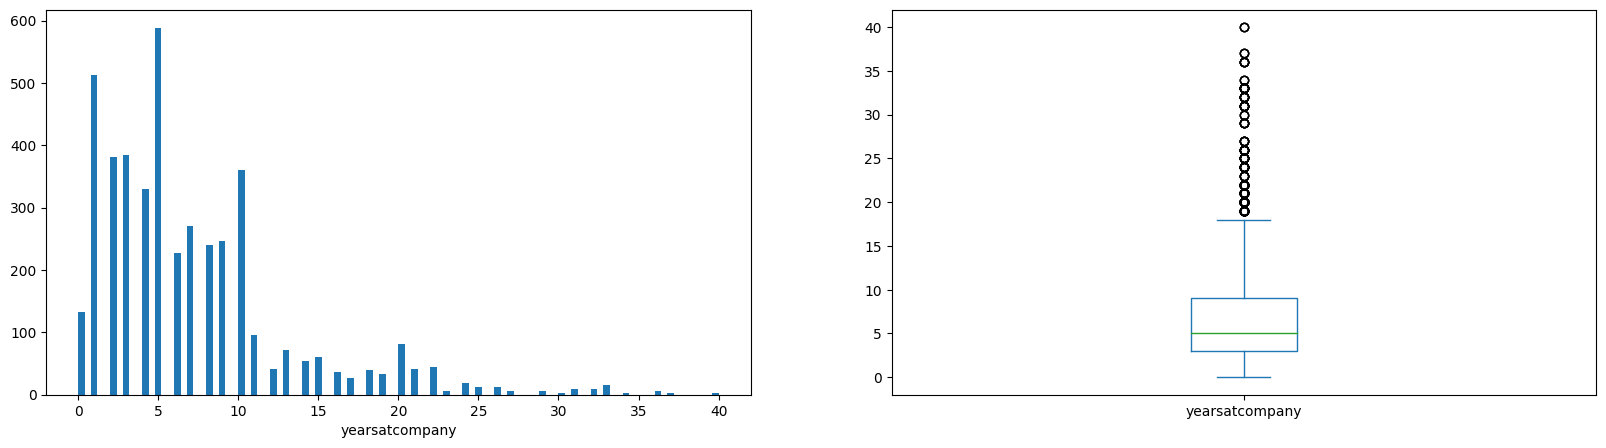

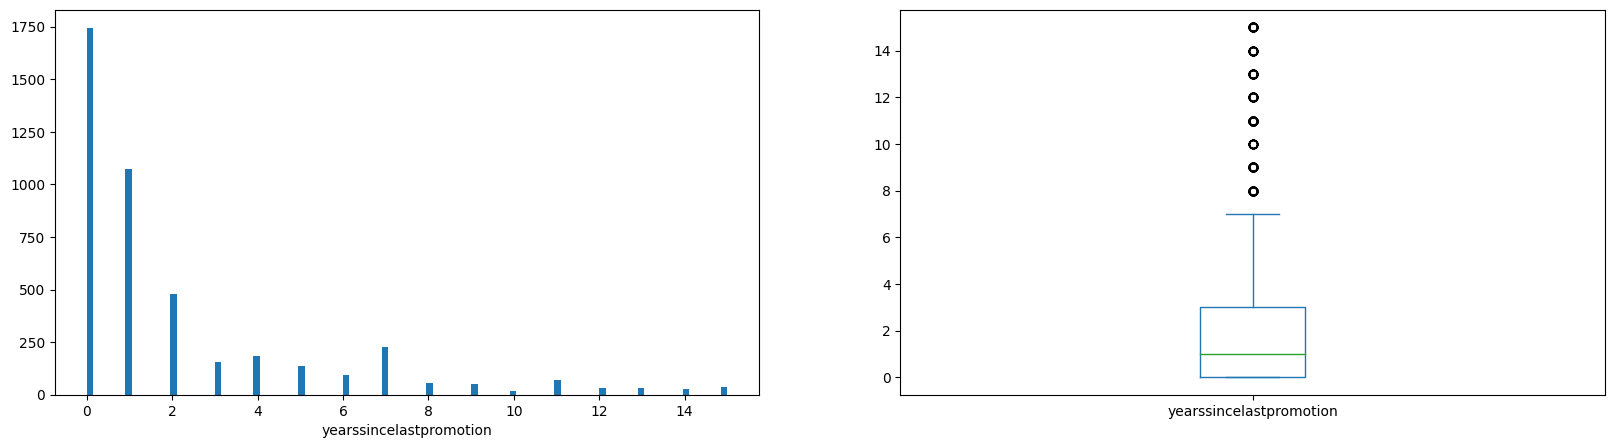

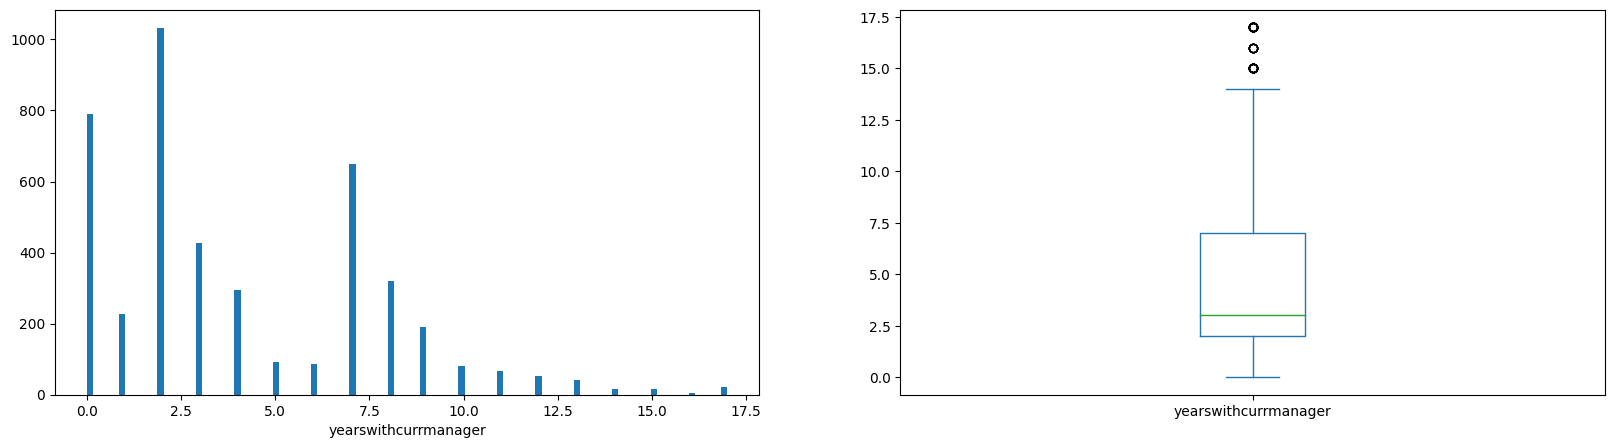

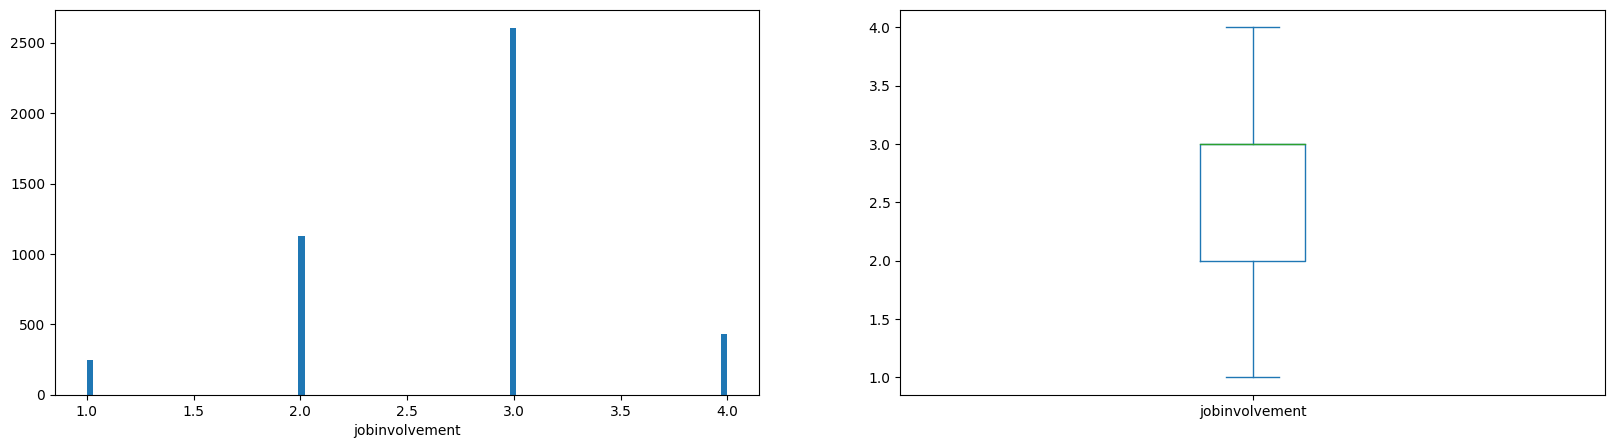

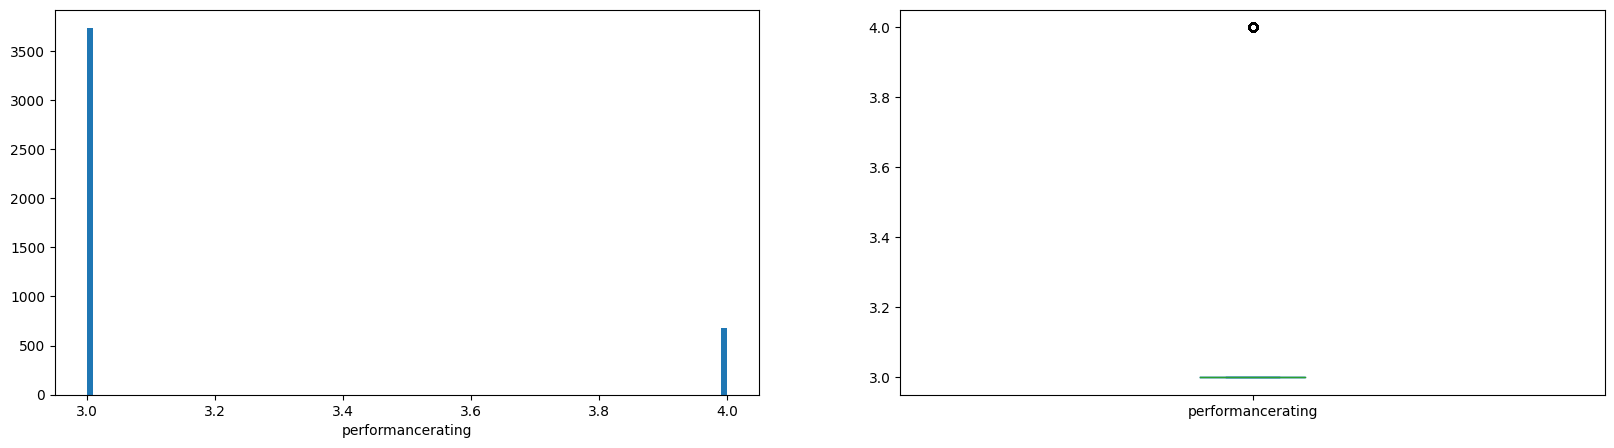

In [9]:
#COLUMNAS NUMERICAS ENTERAS
X_int2016=r_2016.select_dtypes(include=['int64'])
# X_int


for variable in X_int2016:
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_int2016[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_int2016[variable].plot(kind='box')

In [10]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t2015=pd.concat([X_int2015["stockoptionlevel"],X_int2015["performancerating"],X_int2015["jobinvolvement"],X_int2015["joblevel"],X_int2015["education"]],axis=1)
t2015=t2015.astype(str)
t2015=pd.get_dummies(t2015)
X_object_t2015=pd.concat([X_int2015, t2015], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2015["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2015["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2015["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2015["joblevel"].unique())
print("Categorias de Education: ", X_int2015["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2015["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2015.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2015=X_int2015.astype(int)
X_int2015.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,6,131160,11,6,1,0,0
1,31,10,41890,23,3,5,1,4
2,32,17,193280,15,2,5,0,3
3,38,2,83210,11,5,8,7,5
4,32,10,23420,12,2,6,0,4


In [11]:
X_int2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      4410 non-null   int64
 1   distancefromhome         4410 non-null   int64
 2   monthlyincome            4410 non-null   int64
 3   percentsalaryhike        4410 non-null   int64
 4   trainingtimeslastyear    4410 non-null   int64
 5   yearsatcompany           4410 non-null   int64
 6   yearssincelastpromotion  4410 non-null   int64
 7   yearswithcurrmanager     4410 non-null   int64
dtypes: int64(8)
memory usage: 275.8 KB


In [12]:
##De los histogramas se observa que las siguientes variables se comportan como variables categoricas, por tanto se deben codificar y posteriormente agregar a la base de categoricas.
t2016=pd.concat([X_int2016["stockoptionlevel"],X_int2016["performancerating"],X_int2016["jobinvolvement"],X_int2016["joblevel"],X_int2016["education"]],axis=1)
t2016=t2016.astype(str)
t2016=pd.get_dummies(t2016)
X_object_t2016=pd.concat([X_int2016, t2016], axis=1)
#veamos las categorias de estas variables
print("Categorias de StockOptionLevel: ", X_int2016["stockoptionlevel"].unique())
print("Categorias de PerformanceRating: ", X_int2016["performancerating"].unique())
print("Categorias de JobInvolvement: ", X_int2016["jobinvolvement"].unique())
print("Categorias de JobLevel: ", X_int2016["joblevel"].unique())
print("Categorias de Education: ", X_int2016["education"].unique())
print("Categorias de TrainingTimesLastYear: ", X_int2016["trainingtimeslastyear"].unique())


#Se eliminan las variables que se pasaron a categoricas
X_int2016.drop(["stockoptionlevel","performancerating","jobinvolvement","joblevel","education"], axis = 1, inplace = True)
##las demas variables se llevan a tipo float para asegurar la escala de los datos
X_int2016=X_int2016.astype(int)
X_int2016.head()

Categorias de StockOptionLevel:  [0 1 3 2]
Categorias de PerformanceRating:  [3 4]
Categorias de JobInvolvement:  [3 2 1 4]
Categorias de JobLevel:  [1 4 3 2 5]
Categorias de Education:  [2 1 4 5 3]
Categorias de TrainingTimesLastYear:  [6 3 2 5 4 0 1]


,age,distancefromhome,monthlyincome,percentsalaryhike,trainingtimeslastyear,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager
0,51,6,131160,11,6,1,0,0
1,31,10,41890,23,3,5,1,4
2,32,17,193280,15,2,5,0,3
3,38,2,83210,11,5,8,7,5
4,32,10,23420,12,2,6,0,4


In [13]:
#COLUMNAS OBJECT
X_object2015=r_2015.select_dtypes(include=['object'])
X_object2016=r_2016.select_dtypes(include=['object'])

In [14]:
X_object2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   businesstravel     4410 non-null   object
 1   department         4410 non-null   object
 2   educationfield     4410 non-null   object
 3   gender             4410 non-null   object
 4   jobrole            4410 non-null   object
 5   maritalstatus      4410 non-null   object
 6   target             4410 non-null   object
 7   retirementtype     4410 non-null   object
 8   resignationreason  4410 non-null   object
dtypes: object(9)
memory usage: 310.2+ KB


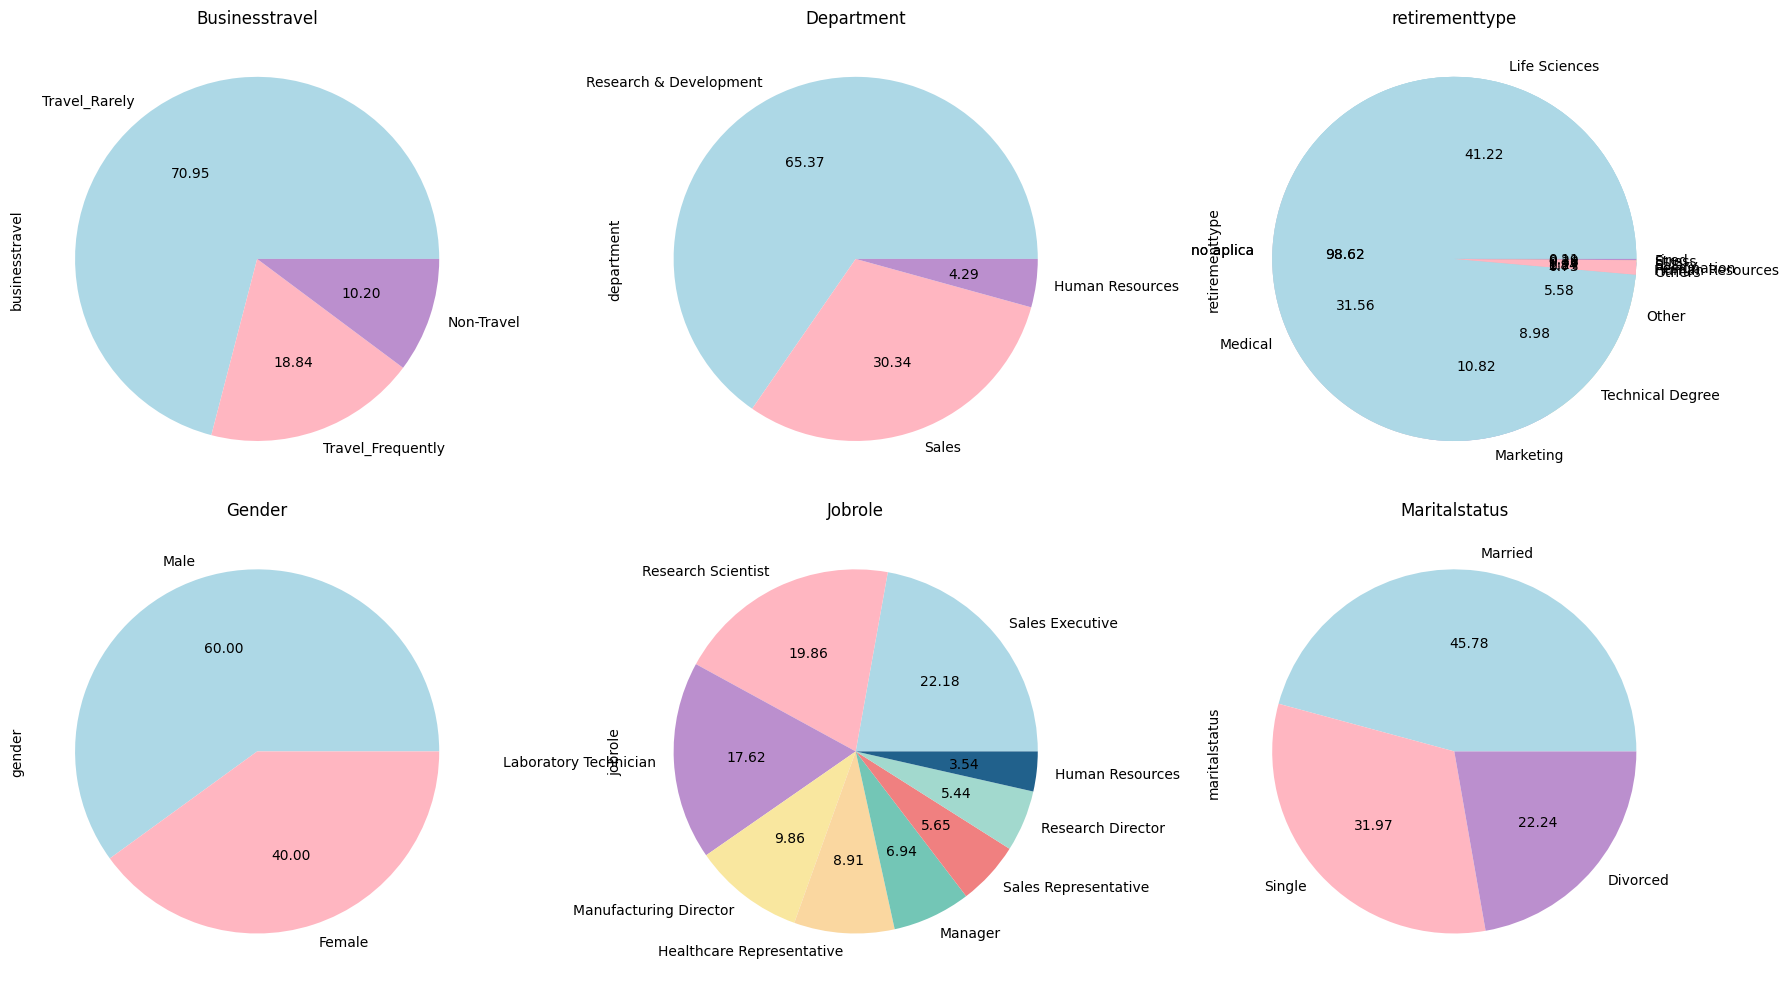

In [16]:
# Crear una figura con subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Gráfico de pastel para 'businesstravel'
r_2015['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel')

# Gráfico de pastel para 'department'
r_2015['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department')

# Gráfico de pastel para 'educationfield'
r_2015['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('Educationfield')

# Gráfico de pastel para 'gender'
r_2015['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 0])
axes[1, 0].set_title('Gender')

# Gráfico de pastel para 'jobrole'
r_2015['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[1, 1])
axes[1, 1].set_title('Jobrole')

# Gráfico de pastel para 'maritalstatus'
r_2015['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[1, 2])
axes[1, 2].set_title('Maritalstatus')

r_2015['resignationreason'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('resignationreason')

r_2015['retirementtype'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('retirementtype')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

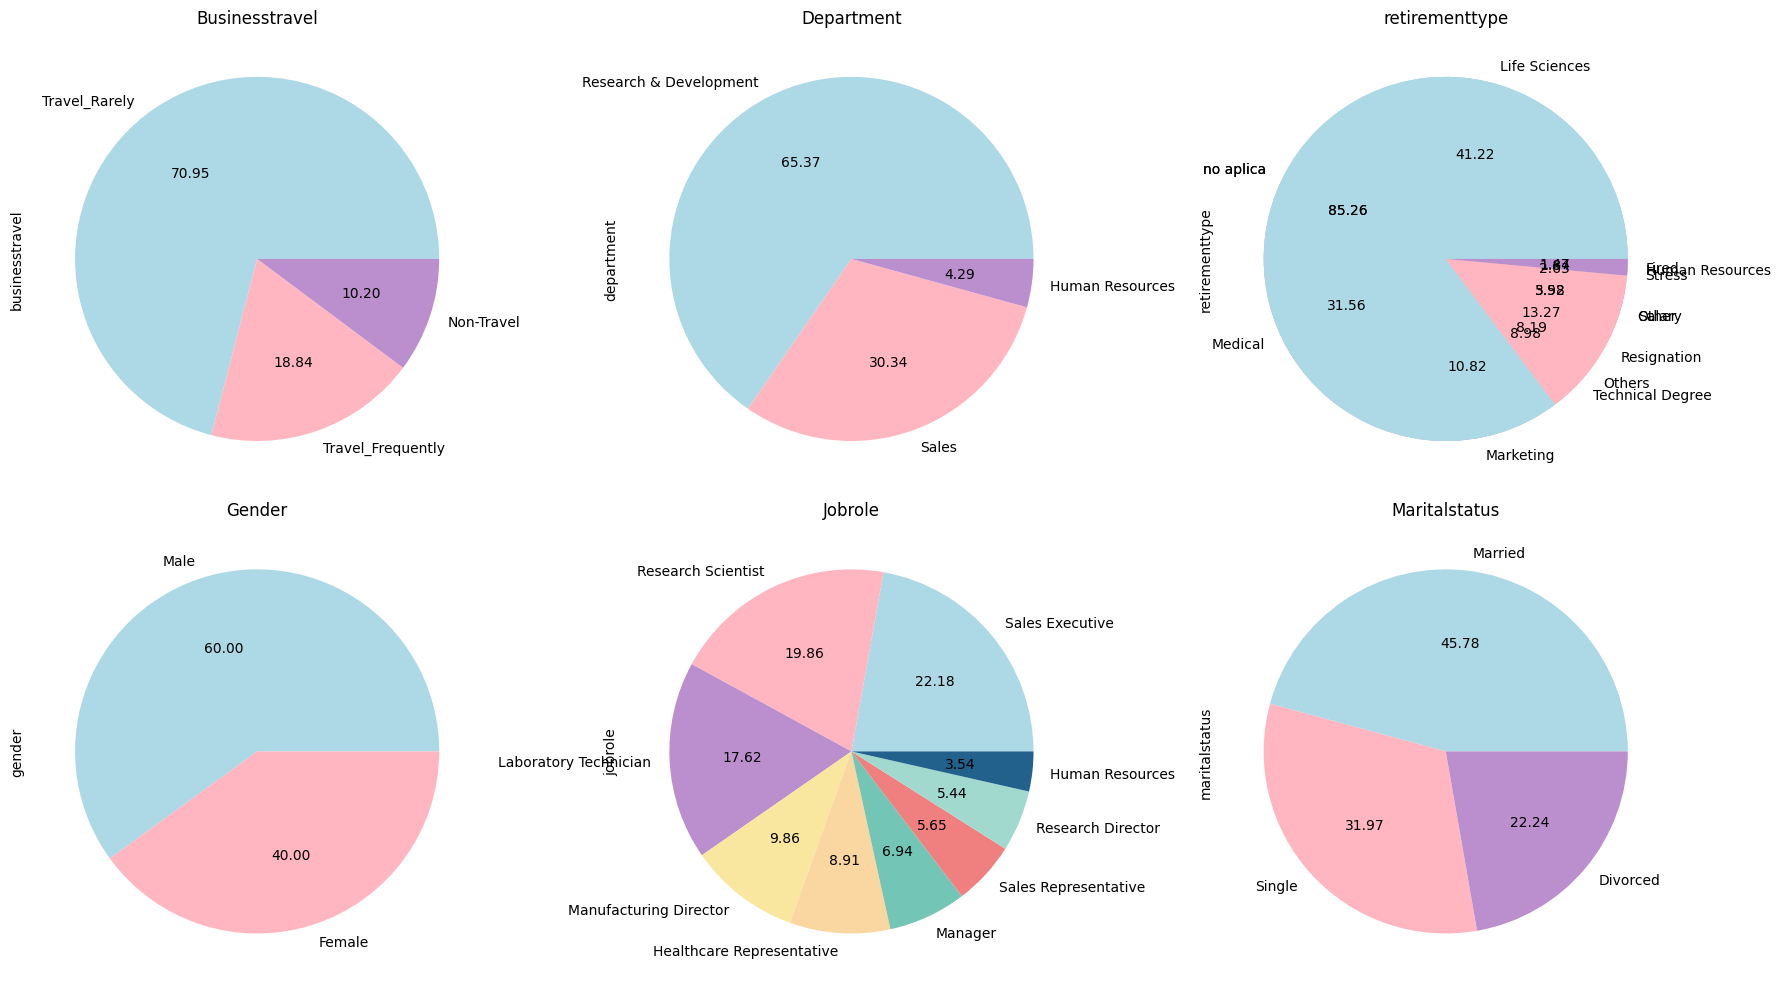

In [17]:
# Crear una figura con subplots organizados en 2 filas y 3 columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Gráfico de pastel para 'businesstravel'
r_2016['businesstravel'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 0])
axes[0, 0].set_title('Businesstravel')

# Gráfico de pastel para 'department'
r_2016['department'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[0, 1])
axes[0, 1].set_title('Department')

# Gráfico de pastel para 'educationfield'
r_2016['educationfield'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('Educationfield')

# Gráfico de pastel para 'gender'
r_2016['gender'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink'], ax=axes[1, 0])
axes[1, 0].set_title('Gender')

# Gráfico de pastel para 'jobrole'
r_2016['jobrole'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6','#F08080','#A2D9CE','#21618C'], ax=axes[1, 1])
axes[1, 1].set_title('Jobrole')

# Gráfico de pastel para 'maritalstatus'
r_2016['maritalstatus'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE'], ax=axes[1, 2])
axes[1, 2].set_title('Maritalstatus')

r_2016['resignationreason'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('resignationreason')

r_2016['retirementtype'].value_counts().plot(kind='pie', autopct='%.2f', colors=['lightblue', 'lightpink','#BB8FCE','#F9E79F','#FAD7A0','#73C6B6'], ax=axes[0, 2])
axes[0, 2].set_title('retirementtype')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [18]:
ttt2015=pd.concat([X_object2015["maritalstatus"],X_object2015["gender"],X_object2015["department"],X_object2015["educationfield"],X_object2015["businesstravel"],X_object2015["retirementtype"],X_object2015["resignationreason"]],axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt2015=ttt2015.astype(str)# se cambia el tipo de datos a string
ttt2015=pd.get_dummies(ttt2015)# se convirten a dummies
X_object_t2015=pd.concat([X_object2015, ttt2015], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de maritalstatus: ", X_object2015["maritalstatus"].unique())
print("Categorias de gender: ", X_object2015["gender"].unique())
print("Categorias de department: ", X_object2015["educationfield"].unique())
print("Categorias de department: ", X_object2015["department"].unique())
print("Categorias de busisnesstravel: ", X_object2015["businesstravel"].unique())
print("Categorias de department: ", X_object2015["retirementtype"].unique())
print("Categorias de department: ", X_object2015["resignationreason"].unique())


Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorias de department:  ['no aplica' 'Resignation' 'Fired']
Categorias de department:  ['no aplica' 'Others' 'Salary' 'Stress']


In [19]:
ttt2016=pd.concat([X_object2016["maritalstatus"],X_object2016["gender"],X_object2016["department"],X_object2016["educationfield"],X_object2016["businesstravel"],X_object2016["retirementtype"],X_object2016["resignationreason"]],axis=1)#concatenar las variables categoricas que se encuentran en X_object
ttt2016=ttt2016.astype(str)# se cambia el tipo de datos a string
ttt2016=pd.get_dummies(ttt2016)# se convirten a dummies
X_object_t2016=pd.concat([X_object2016, ttt2016], axis=1)#concatenamos categoricas con objeto

#veamos las categorias de estas variables
print("Categorias de maritalstatus: ", X_object2016["maritalstatus"].unique())
print("Categorias de gender: ", X_object2016["gender"].unique())
print("Categorias de department: ", X_object2016["educationfield"].unique())
print("Categorias de department: ", X_object2016["department"].unique())
print("Categorias de busisnesstravel: ", X_object2016["businesstravel"].unique())
print("Categorias de department: ", X_object2016["retirementtype"].unique())
print("Categorias de department: ", X_object2016["resignationreason"].unique())

Categorias de maritalstatus:  ['Married' 'Single' 'Divorced']
Categorias de gender:  ['Female' 'Male']
Categorias de department:  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorias de department:  ['Sales' 'Research & Development' 'Human Resources']
Categorias de busisnesstravel:  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorias de department:  ['no aplica' 'Resignation' 'Fired']
Categorias de department:  ['no aplica' 'Others' 'Stress' 'Salary']


In [20]:
X_object_t2015.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole","retirementtype","resignationreason"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto
X_object_t2016.drop(["maritalstatus","gender","department","businesstravel","target","educationfield","jobrole","retirementtype","resignationreason"], axis = 1, inplace = True)#eliminación de variables categoricas y las objeto

In [21]:
X_object_t2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   maritalstatus_Divorced             4410 non-null   uint8
 1   maritalstatus_Married              4410 non-null   uint8
 2   maritalstatus_Single               4410 non-null   uint8
 3   gender_Female                      4410 non-null   uint8
 4   gender_Male                        4410 non-null   uint8
 5   department_Human Resources         4410 non-null   uint8
 6   department_Research & Development  4410 non-null   uint8
 7   department_Sales                   4410 non-null   uint8
 8   educationfield_Human Resources     4410 non-null   uint8
 9   educationfield_Life Sciences       4410 non-null   uint8
 10  educationfield_Marketing           4410 non-null   uint8
 11  educationfield_Medical             4410 non-null   uint8
 12  educationfield_Other

In [26]:
X_float2015 = r_2015.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float2016 = r_2016.select_dtypes(include=['float64'])#se crea copia donde aparazcan las variables de tipo float
X_float2015

,environmentsatisfaction,jobsatisfaction,worklifebalance,numcompaniesworked,totalworkingyears
0,3.0,4.0,2.0,1.0,1.0
1,3.0,2.0,4.0,0.0,6.0
2,2.0,2.0,1.0,1.0,5.0
3,4.0,4.0,3.0,3.0,13.0
4,4.0,1.0,3.0,4.0,9.0
...,...,...,...,...,...
4405,4.0,1.0,3.0,3.0,10.0
4406,4.0,4.0,3.0,2.0,10.0
4407,1.0,3.0,3.0,0.0,5.0
4408,4.0,1.0,3.0,0.0,10.0


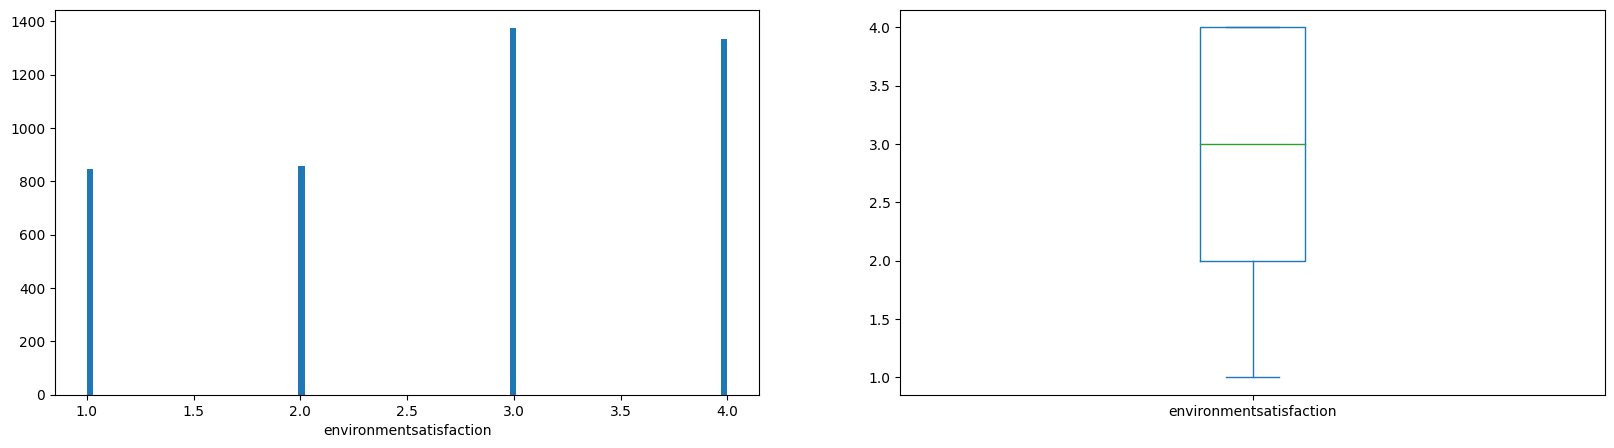

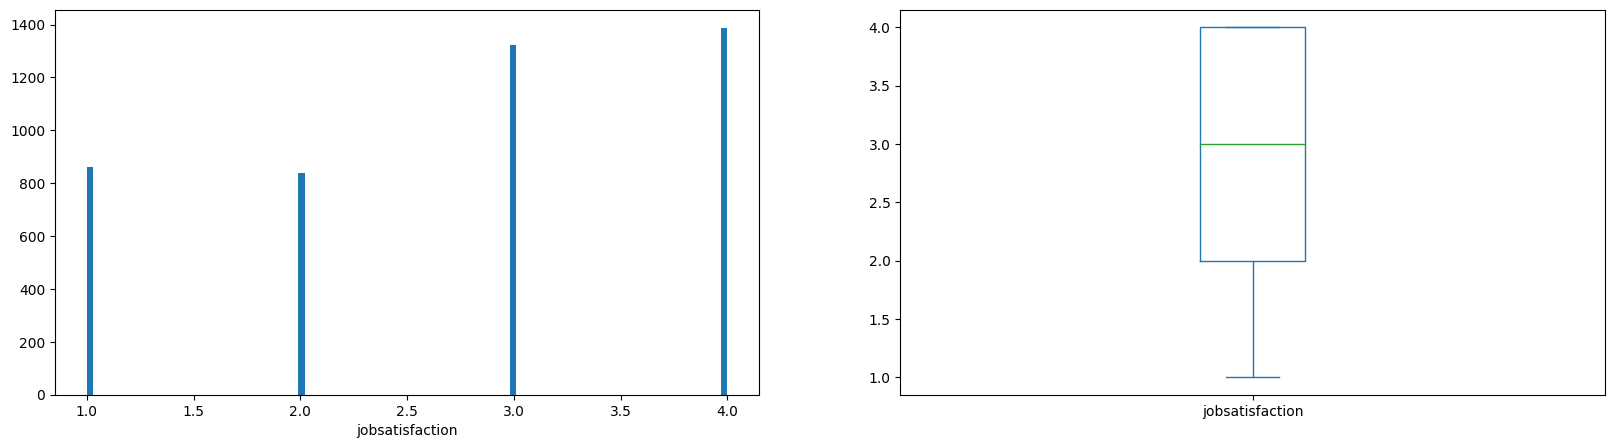

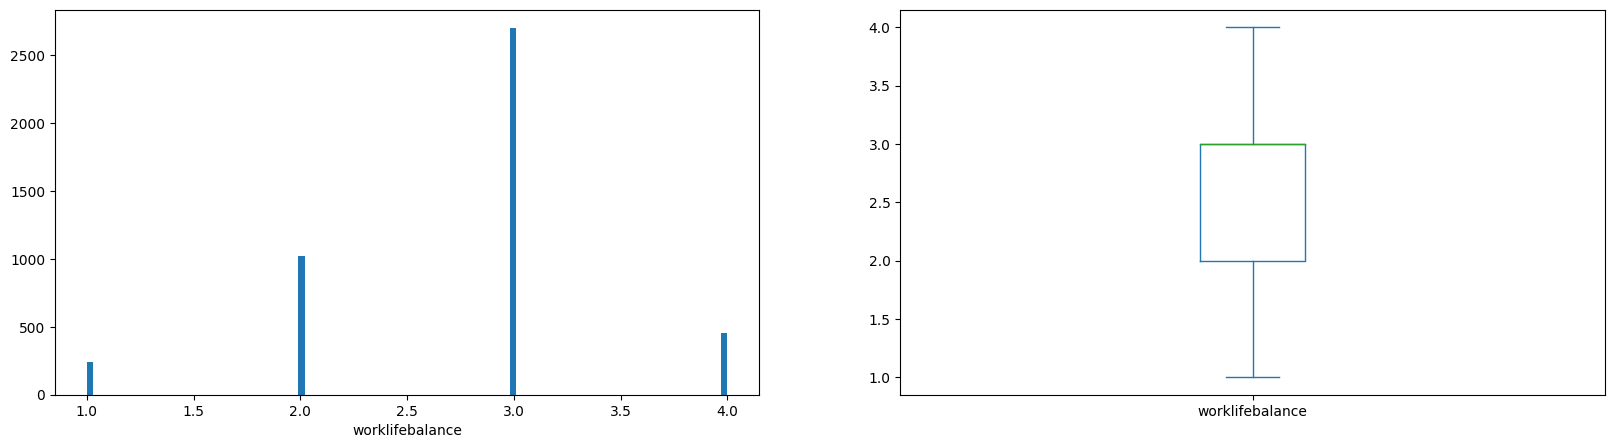

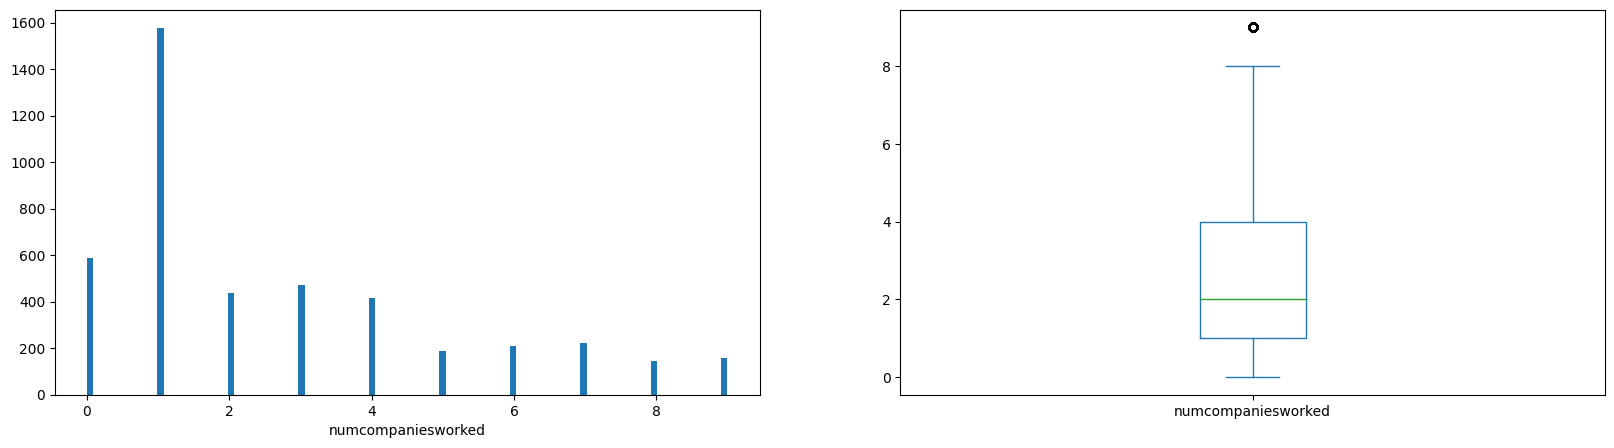

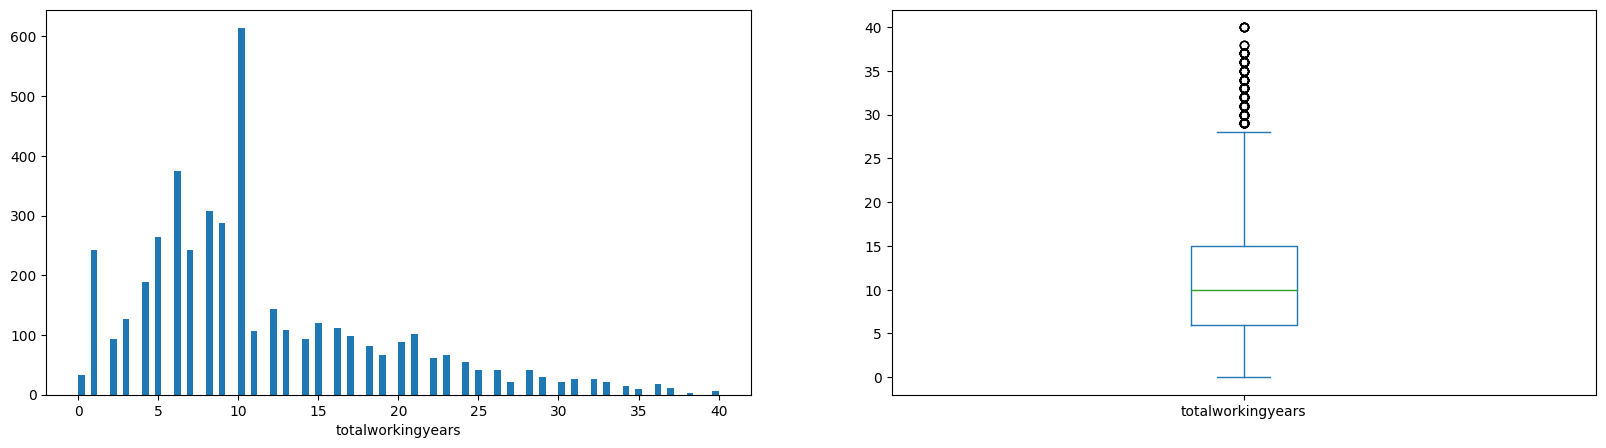

In [27]:
for variable in X_float2015: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float2015[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float2015[variable].plot(kind='box')

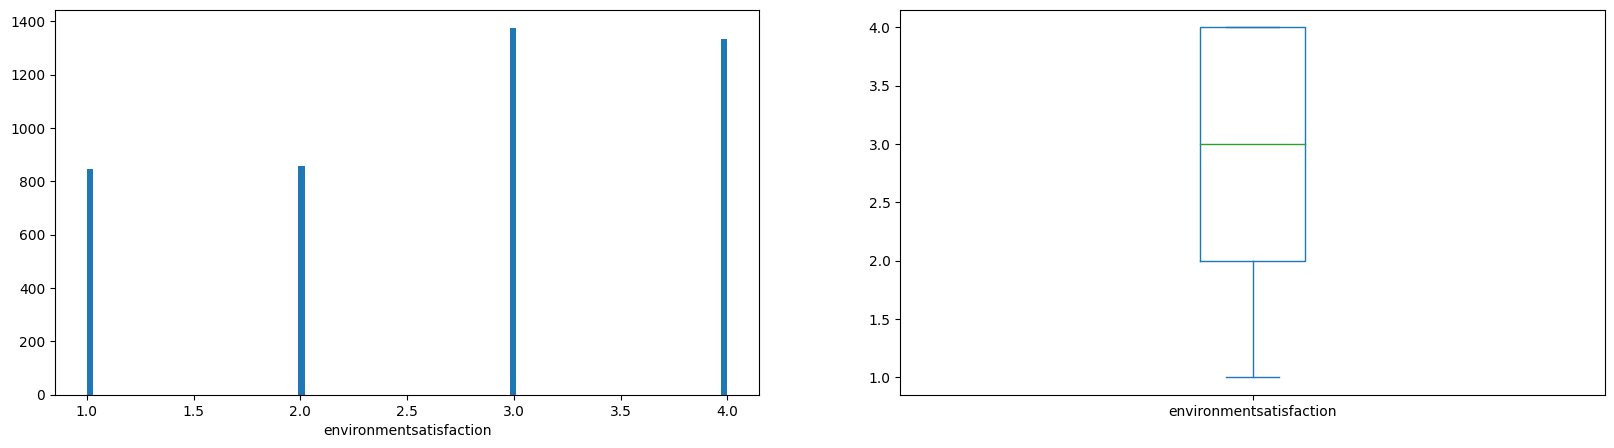

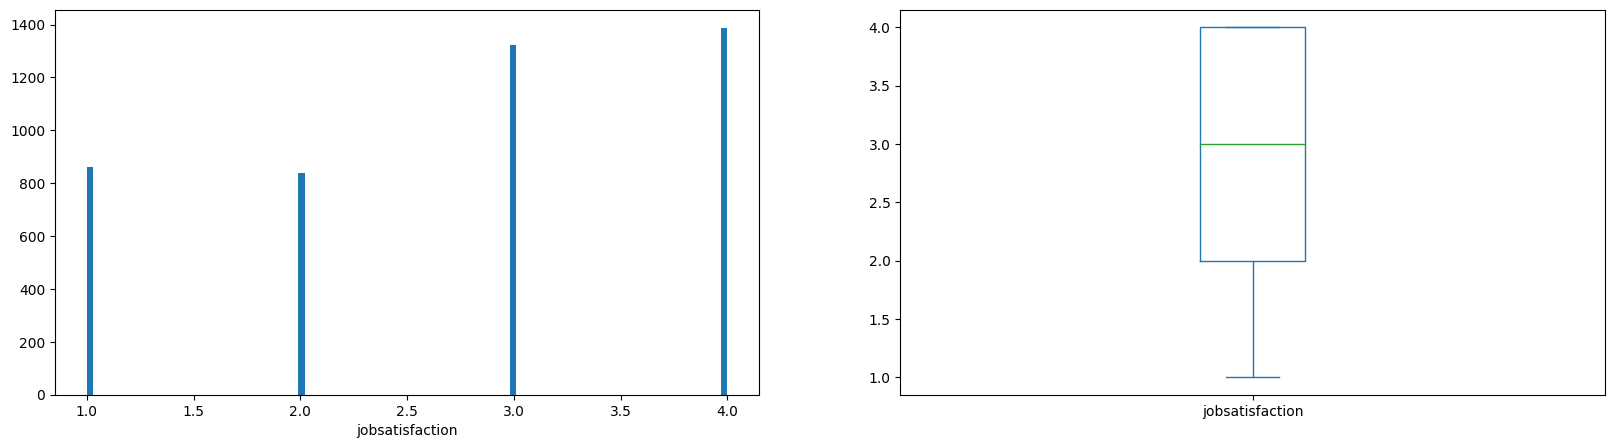

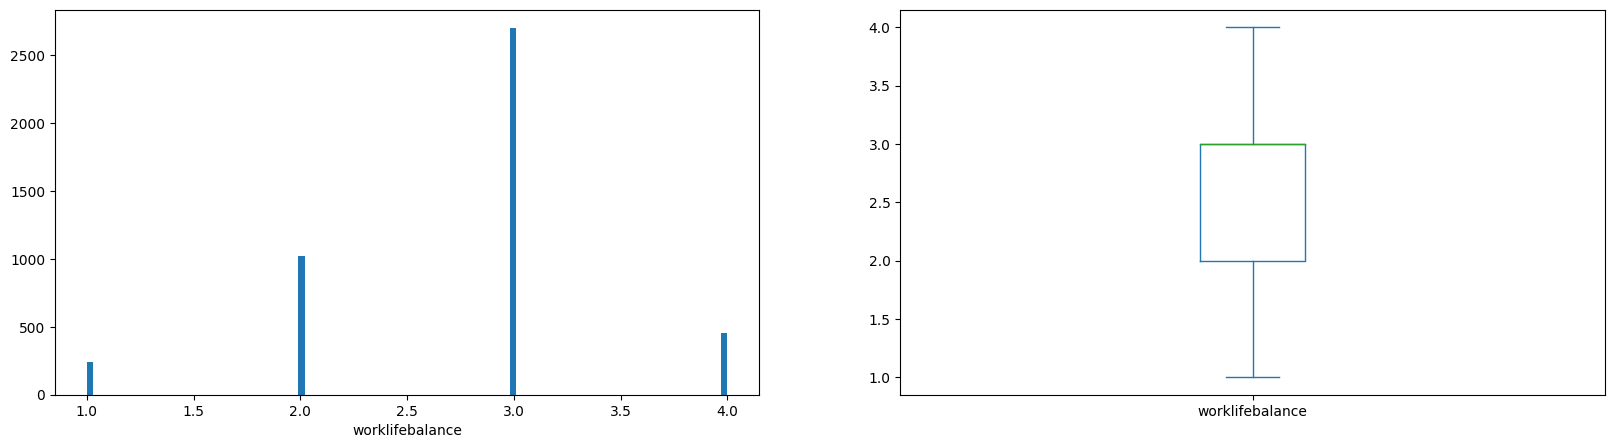

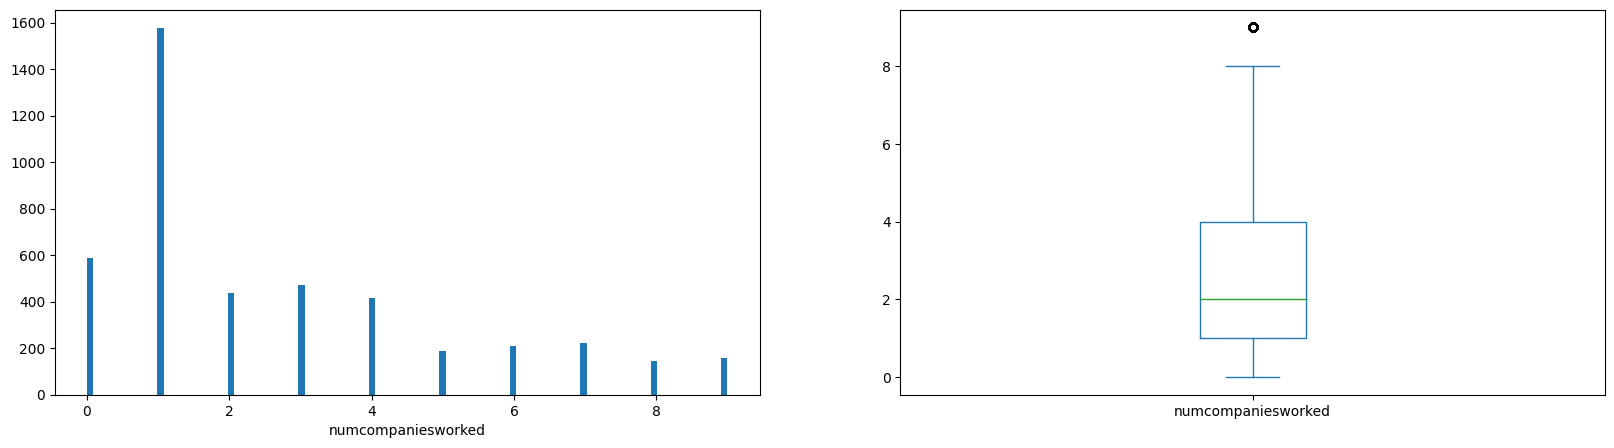

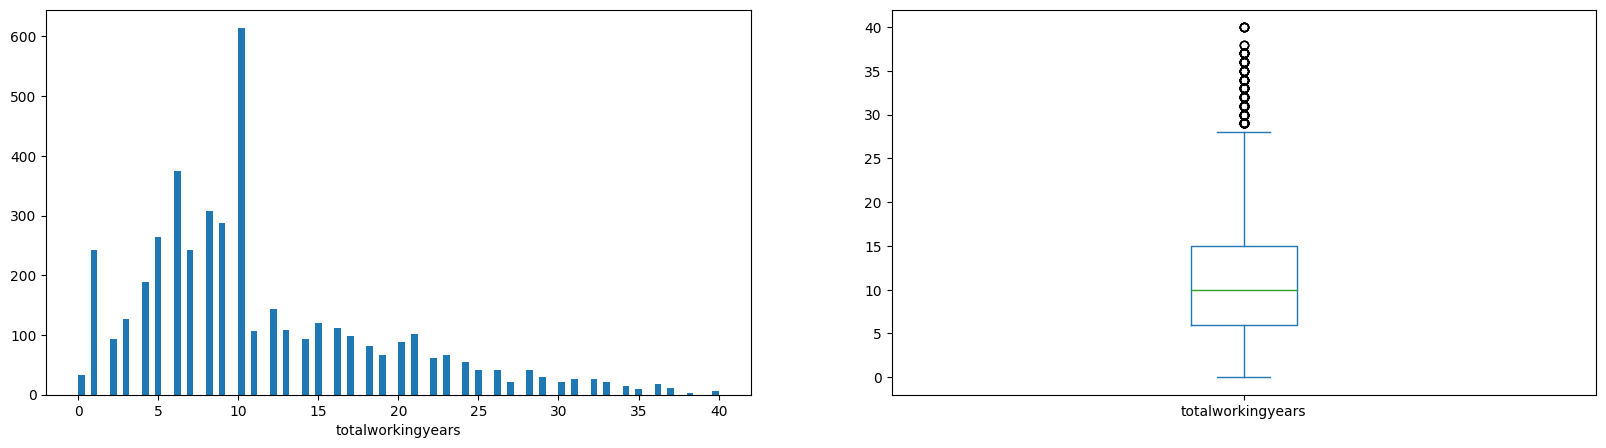

In [28]:
for variable in X_float2016: # se crea graficos para las variables float
  plt.figure(figsize=(20, 5))
  plt.subplot(1,2,1)
  plt.hist(X_float2016[variable],100)
  plt.xlabel(variable)
  plt.subplot(1,2,2)
  X_float2016[variable].plot(kind='box')

In [29]:
tt2015=pd.concat([X_float2015["environmentsatisfaction"],X_float2015["jobsatisfaction"],X_float2015["worklifebalance"]],axis=1)
tt2015=tt2015.astype(str)
tt2015=pd.get_dummies(tt2015)
X_object_t2015=pd.concat([X_object_t2015, tt2015], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float2015.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)


In [30]:
tt2016=pd.concat([X_float2016["environmentsatisfaction"],X_float2016["jobsatisfaction"],X_float2016["worklifebalance"]],axis=1)
tt2016=tt2016.astype(str)
tt2016=pd.get_dummies(tt2016)
X_object_t2016=pd.concat([X_object_t2016, tt2016], axis=1)

#Se eliminan las variables que se pasaron a categoricas
X_float2016.drop(["environmentsatisfaction","jobsatisfaction","worklifebalance"], axis = 1, inplace = True)


In [31]:
X_object_t2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   maritalstatus_Divorced             4410 non-null   uint8
 1   maritalstatus_Married              4410 non-null   uint8
 2   maritalstatus_Single               4410 non-null   uint8
 3   gender_Female                      4410 non-null   uint8
 4   gender_Male                        4410 non-null   uint8
 5   department_Human Resources         4410 non-null   uint8
 6   department_Research & Development  4410 non-null   uint8
 7   department_Sales                   4410 non-null   uint8
 8   educationfield_Human Resources     4410 non-null   uint8
 9   educationfield_Life Sciences       4410 non-null   uint8
 10  educationfield_Marketing           4410 non-null   uint8
 11  educationfield_Medical             4410 non-null   uint8
 12  educationfield_Other

In [32]:
X_object_t2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   maritalstatus_Divorced             4410 non-null   uint8
 1   maritalstatus_Married              4410 non-null   uint8
 2   maritalstatus_Single               4410 non-null   uint8
 3   gender_Female                      4410 non-null   uint8
 4   gender_Male                        4410 non-null   uint8
 5   department_Human Resources         4410 non-null   uint8
 6   department_Research & Development  4410 non-null   uint8
 7   department_Sales                   4410 non-null   uint8
 8   educationfield_Human Resources     4410 non-null   uint8
 9   educationfield_Life Sciences       4410 non-null   uint8
 10  educationfield_Marketing           4410 non-null   uint8
 11  educationfield_Medical             4410 non-null   uint8
 12  educationfield_Other

In [33]:
X_float2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numcompaniesworked  4410 non-null   float64
 1   totalworkingyears   4410 non-null   float64
dtypes: float64(2)
memory usage: 69.0 KB


In [34]:
X_float2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numcompaniesworked  4410 non-null   float64
 1   totalworkingyears   4410 non-null   float64
dtypes: float64(2)
memory usage: 69.0 KB


In [35]:
X_int2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      4410 non-null   int64
 1   distancefromhome         4410 non-null   int64
 2   monthlyincome            4410 non-null   int64
 3   percentsalaryhike        4410 non-null   int64
 4   trainingtimeslastyear    4410 non-null   int64
 5   yearsatcompany           4410 non-null   int64
 6   yearssincelastpromotion  4410 non-null   int64
 7   yearswithcurrmanager     4410 non-null   int64
dtypes: int64(8)
memory usage: 275.8 KB


In [36]:
X_int2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      4410 non-null   int64
 1   distancefromhome         4410 non-null   int64
 2   monthlyincome            4410 non-null   int64
 3   percentsalaryhike        4410 non-null   int64
 4   trainingtimeslastyear    4410 non-null   int64
 5   yearsatcompany           4410 non-null   int64
 6   yearssincelastpromotion  4410 non-null   int64
 7   yearswithcurrmanager     4410 non-null   int64
dtypes: int64(8)
memory usage: 275.8 KB
